In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('.'))

In [4]:
import lib.Hopfield as H

In [29]:
class FloatArrayConverter(H.Hopfield_converter):
    
    width = 50
    bits_len = 8 

    def __init__(self, width=50, bits_len=8):
        self.width=width
        self.bits_len=bits_len

    def toBits(self, num):
        n = np.full(bits, -1)
        f = [1 if c == '1' else -1 for c in "{0:b}".format(int(num*100))[::-1]]
        for i in range(min([self.bits_len, len(f)])):
            n[i] = f[i]
        return n

    def fromBits(self, bits):
        return int(''.join(['1' if b == 1 else '0' for b in bits[::-1]]), 2) / 100

    def to_hop(self, data):
        return np.array([self.toBits(n) for n in arr]).flatten()

    def from_hop(self, bits):
        return np.array([self.fromBits(b) for b in bits.reshape((self.width, self.bits_len))])

In [30]:
npzfile = np.load("dataset.npz")
dataset_x = npzfile['arr_0']
dataset_y = npzfile['arr_1']
DATA_WIDTH = dataset_x.shape[1] // 8

In [31]:
COUNT = 6
net = H.Hopfield_network()
net.train(DATA_WIDTH*8, dataset_y[:COUNT])

In [36]:
out = net.retrieve_pattern(dataset_x[0])
c = FloatArrayConverter(DATA_WIDTH, 8)

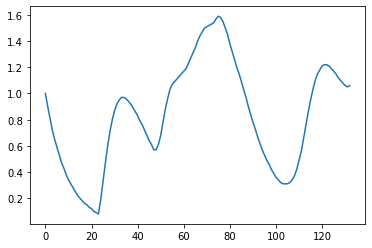

In [37]:
plt.plot(c.from_hop(out))